Data Cleaning

In [2]:
import pandas as pd
import numpy as npa
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.csv', encoding = 'Latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df = df.iloc[:,0:2]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.rename(columns = {'v1':'target','v2':'data'},inplace = True)
df

C:\Users\khush\AppData\Local\Temp/ipykernel_2272/1033556908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'v1':'target','v2':'data'},inplace = True)


,target,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

C:\Users\khush\AppData\Local\Temp/ipykernel_2272/4244433786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = encoder.fit_transform(df['target'])


,target,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#checking missing values
df.isnull().sum()

target    0
data      0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
# remove duplicate values
df = df.drop_duplicates(keep = 'first')

EDA

In [12]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

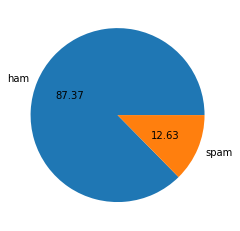

In [13]:
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

Approximately 88% messages are ham and only 12% messages are spam, hence data is unbalanced

Now to check how many characters, words and sentences are used in the messages and to draw a correlation between them

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# now to check the characters in each message
df['num_characters'] = df['data'].apply(len)
df.head()

C:\Users\khush\AppData\Local\Temp/ipykernel_2272/1701062850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['data'].apply(len)


,target,data,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# now to check the number of words 
df['num_words'] = df['data'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\khush\AppData\Local\Temp/ipykernel_2272/3700419330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['data'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,data,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
# now for number of sentences
df['num_sentences'] = df['data'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\khush\AppData\Local\Temp/ipykernel_2272/2914283610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['data'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,data,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


The above data is for HAM messages

In [21]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


The above data is for Spam messages

There is a clear distinction between the average number of characters,words and sentences used in HAM and SPAM

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

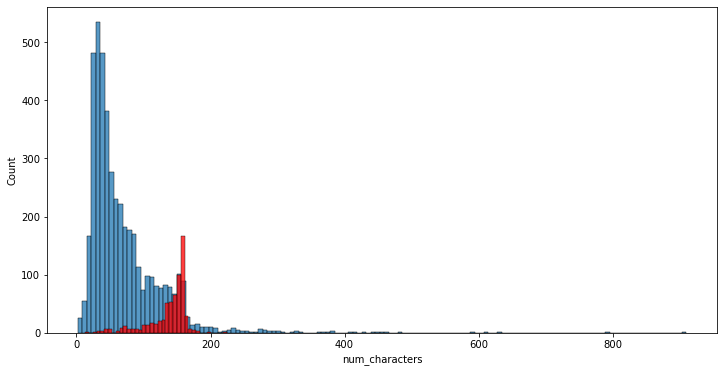

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

Here we can clearly see from the histogram that most of the Ham messages use very few characters, whereas most of the spam messages use a lot of characters

<AxesSubplot:xlabel='num_words', ylabel='Count'>

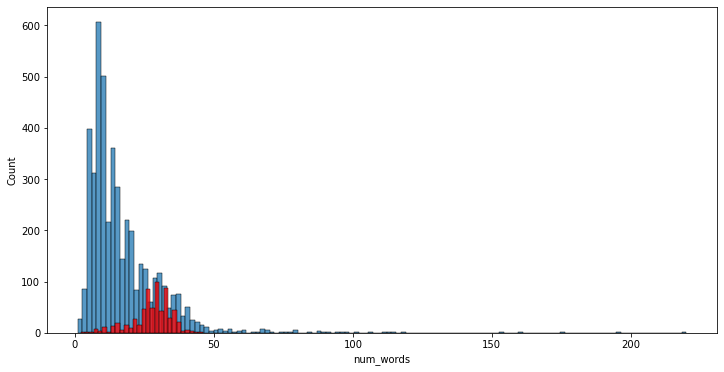

In [23]:
# we can apply the same for number of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

Now to find the relationship between number of words and number of characters

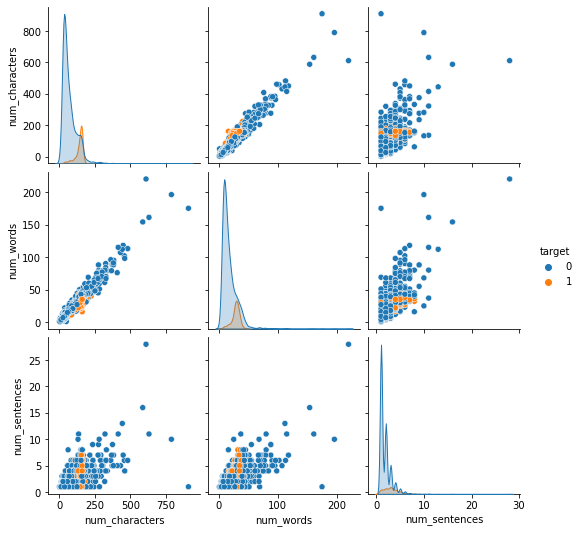

In [24]:
sns.pairplot(df, hue = 'target')

<AxesSubplot:>

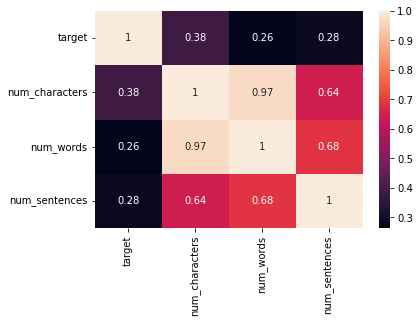

In [25]:
sns.heatmap(df.corr(), annot = True)

This heatmap tells us the correlation between our columns ie num_characters, num_words and num_sentences

Since num_characters has the highest correlation with our target ie if the message is Ham or Spam, we will be using that column

Now to find the most common words used in Ham and Spam messages

# Data Preprocessing


1. Convert to lower case
2. Tokenization
3. Removing Special Characters
4. Removing Stop words and punctuation
5. Stemming

In [26]:
# creation of a function which will perform all the above functions
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
transform_text("I love dancing and singing with my friends.")

'love danc sing friend'

In [28]:
df['transformed_data'] = df['data'].apply(transform_text)

C:\Users\khush\AppData\Local\Temp/ipykernel_2272/2360309992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_data'] = df['data'].apply(transform_text)


In [29]:
!pip install wordcloud

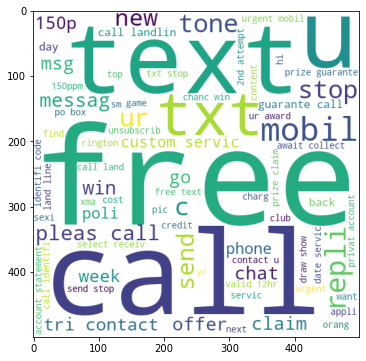

In [30]:
# now we will find the most used words in Ham and Spam messages using word cloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10,background_color = 'white')
spam_wc = wc.generate(df[df['target']==1]['transformed_data'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

Most common words used in spam messages are text,free,call,txt etc.

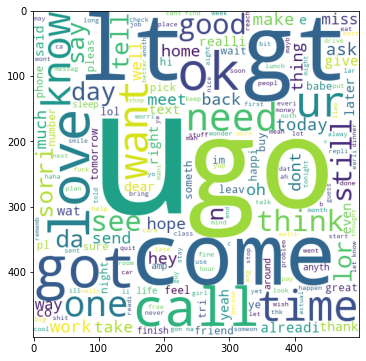

In [31]:
# now to repeat the same for the ham messages
ham_wc = wc.generate(df[df['target']==0]['transformed_data'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

The most common words used in ham messages are above

In [32]:
# now to find the top 30 words in both ham and spam messages
spam_corpus = []
for msg in df[df['target']==1]['transformed_data'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\khush\Anaconda3\envs\spamclassifier\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


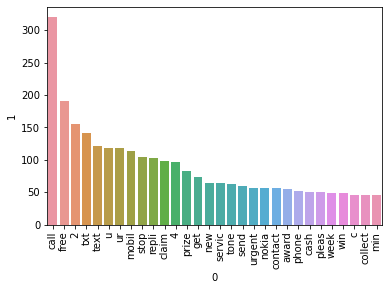

In [33]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [34]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\khush\Anaconda3\envs\spamclassifier\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


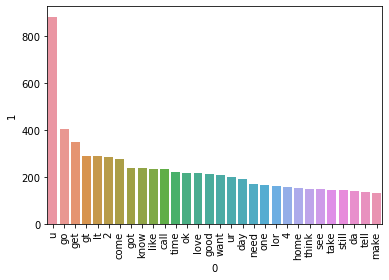

In [35]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [36]:
# we will be using the naive bayes algorithm for this model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [37]:
X = tfidf.fit_transform(df['transformed_data']).toarray()
X.shape

(5169, 3000)

In [38]:
y = df['target'].values

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [41]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [42]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [43]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [44]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


We will chose MNB with tfidf as it has the highest precision score, and as the data is imbalanced ie spam messages are very less precision score will matter more

In [45]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

,target,data,num_characters,num_words,num_sentences,transformed_data
1324,0,Can you call me plz. Your number shows out of ...,139,35,3,call plz number show coveragd area urgnt call ...
3059,0,K..k...from tomorrow onwards started ah?,40,10,1,k k tomorrow onward start ah
3389,1,Please CALL 08712402972 immediately as there i...,81,13,1,pleas call 08712402972 immedi urgent messag wait
1717,1,WOW! The Boys R Back. TAKE THAT 2007 UK Tour. ...,138,33,6,wow boy r back take 2007 uk tour win vip ticke...
2769,1,Burger King - Wanna play footy at a top stadiu...,141,31,2,burger king wan na play footi top stadium get ...
